# Introduction to neural network classification with tensorflow

A classification is where you try to classify something as one thing or another

* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Creating data to view and fit


In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [2]:
# Checkout features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Checkout labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## To get more clarity on current data, let's visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X_0": X[:, 0], "X_1": X[:, 1], "y": y})
circles

,X_0,X_1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


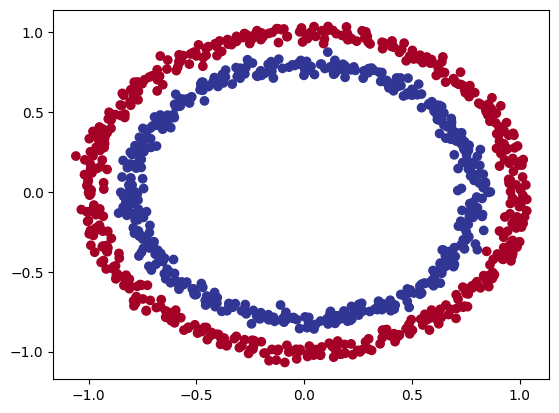

In [5]:
import matplotlib.pyplot as plt
# Visualizing by plotting data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

> To visualize data with neural nets here's a cool website to play with playground.tensorflow.org

# Input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Number of samples
len(X), len(y)

(1000, 1000)

## Steps in Modeling
 1. Create a Model
 2. Compile the model
 3. Fit the model
 4. Evaluate the model

In [8]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [9]:
# Set random seed
tf.random.set_seed(42)
# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 3.9646 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 2.4506 - accuracy: 0.4790
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7629 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4970


This is around 50% accurate model

In [10]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [11]:
# Evaluate the model
model_1.evaluate(X, y)  # It should not be done. This means that we are training and testing on same dataset

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

## It's showing 50% accuracy still. This means that even if I try to guess randomly and guess everything as true or false, I will get the same accuracy as this. This means that our model is not good.

## Let's add an extra layer to improve performance of our model

In [12]:
# Create a model with one extra layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933255791664124, 0.5]

I am still getting the same accuracy as before.

# How can we improve our model?
Common ways of improving model:
- Adding layers
- Increase the number of hidden units
- Change the activation functions
- Change the optimization function
- Change the learning rate (because you can alter each of these, they're hyperparameters)
- Fitting on more data
- Fitting for longer

1. Create model
> We can add more layers

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000


[0.6966485977172852, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary`

- Take in a trained model, features (X) and labels (y)
- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones


In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x values
  x_in = np.c_[xx.ravel(), yy.ravel()] # c_ stacks 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    # this is a multiclass classification problem
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step


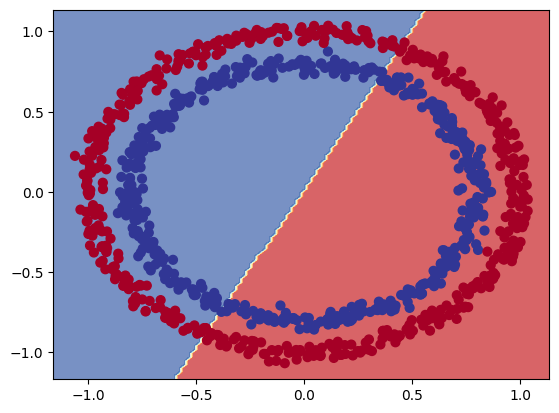

In [18]:
# Plot the predictions
plot_decision_boundary(model=model_3, X=X, y=y);

## Building a non linear activation model

In [19]:
# Setting random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

In [20]:
# 4. Evaluate our model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7760


[0.5894819498062134, 0.7760000228881836]

313/313 [==============================] - 1s 1ms/step


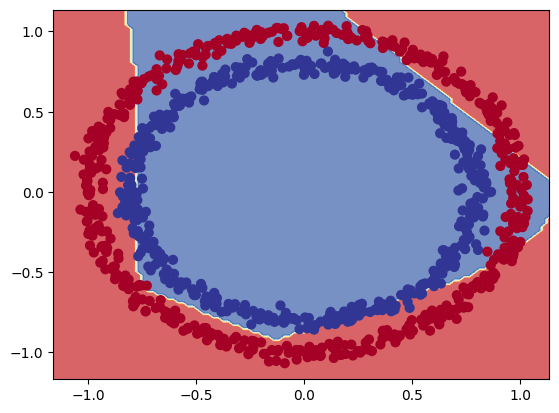

In [21]:
plot_decision_boundary(model_4, X, y)

## Evaluating and Improving our Classification model
- We will do this by splitting data into train and test

In [22]:
# Split the data into train and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6986 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4825
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5163
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5275
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5537
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5537
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5950
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6313
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.7050
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6281 - accuracy: 0.7575
Epoch 11/25
25/25 [

In [24]:
# Evaluatea the model
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9650


[0.16803377866744995, 0.9649999737739563]

## Plot decision boundary for train and test set

313/313 [==============================] - 0s 1ms/step


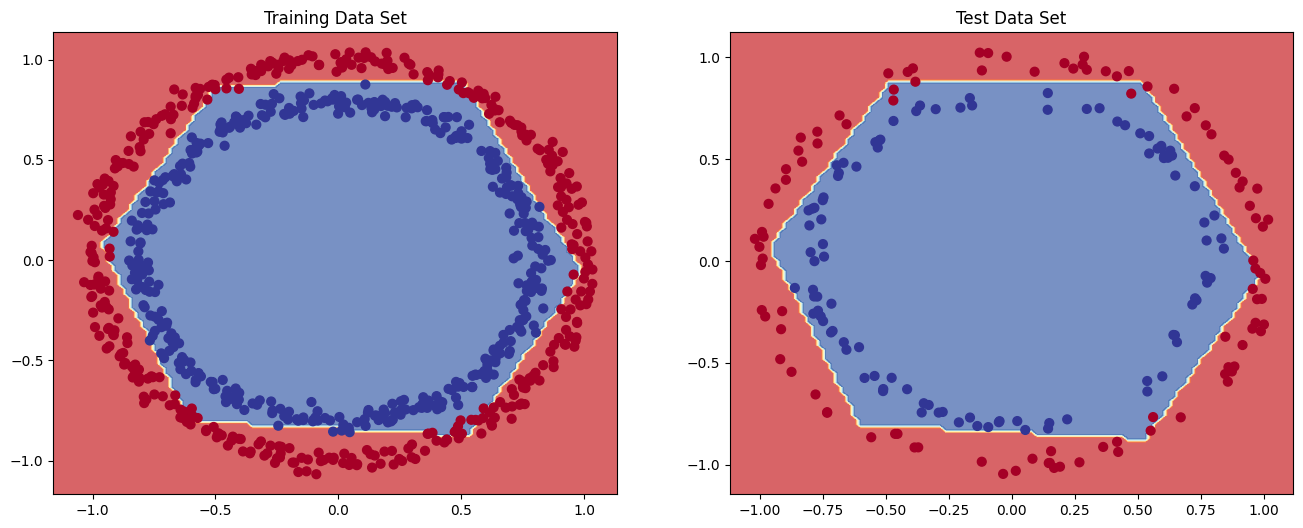

In [25]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1) # subplot 1 row, 2 columns and plot in 1st column
plt.title("Training Data Set")
plot_decision_boundary(model_5, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test Data Set")
plot_decision_boundary(model_5, X_test, y_test)
plt.show();

## Plot the loss or training curves

In [26]:
# Convert history to dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.698646,0.48250
1,0.690994,0.48250
2,0.687376,0.51625
3,0.683547,0.52750
4,0.680663,0.55375
5,0.675246,0.55375
6,0.666904,0.59500
7,0.658911,0.63125
8,0.645618,0.70500
9,0.628140,0.75750


Text(0.5, 1.0, 'Loss Curve')

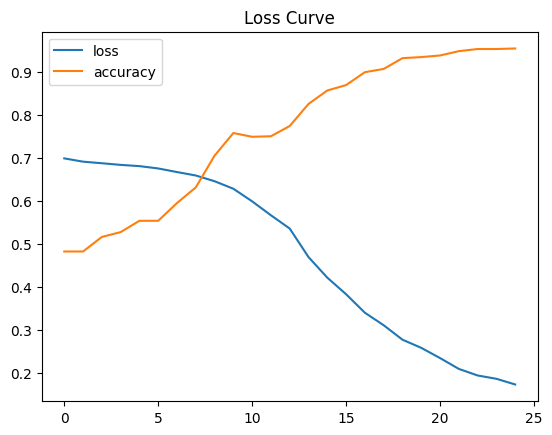

In [27]:
pd.DataFrame(history.history).plot()
plt.title("Loss Curve")

## Finding the best learning rate
To find the ideal learning rate, we're going to use the following steps:
* A learning rate **callback**
* Another model
* A modified loss curves plot

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model including lr_scheduler callback
history = model_6.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7052 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

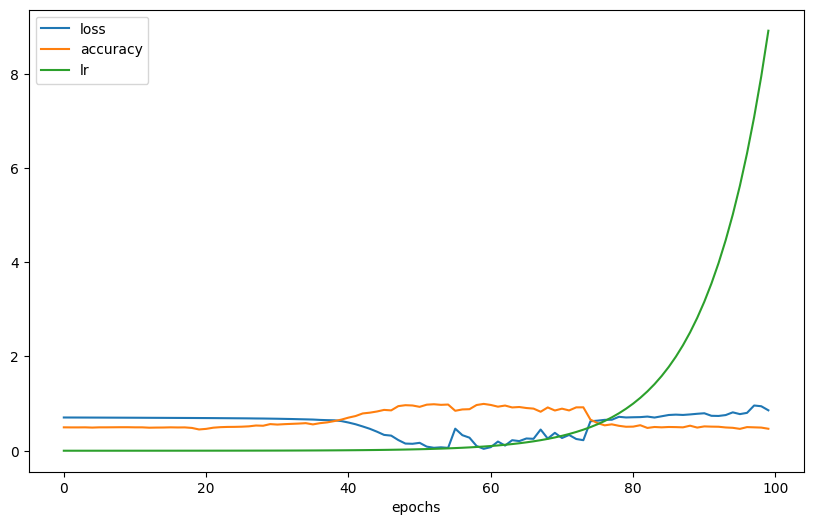

In [29]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 6), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

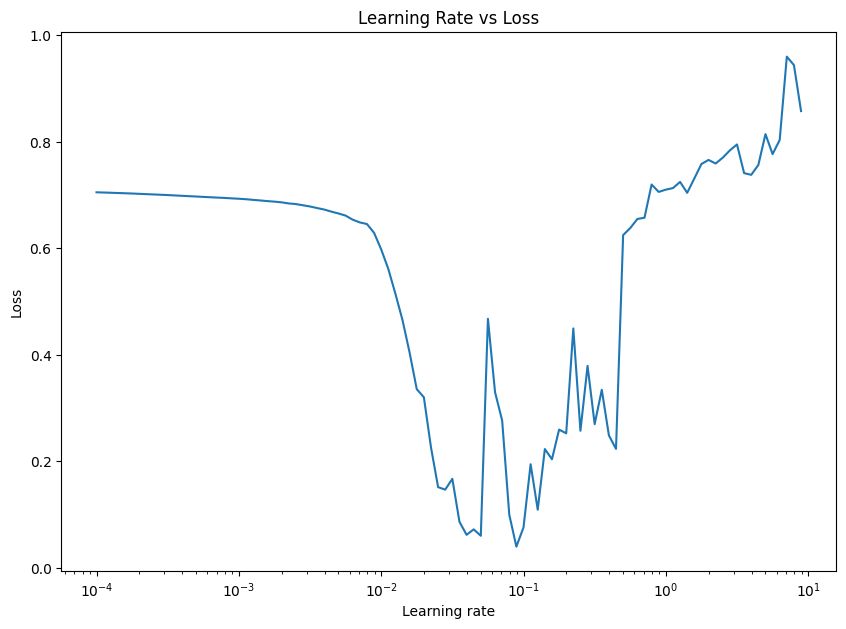

In [30]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

### Creating model with ideal learning rate with 0.02

In [31]:
# Setting random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 3. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=20, verbose=0)

In [32]:
# Evaluate the model on test set
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9900


[0.056866537779569626, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step


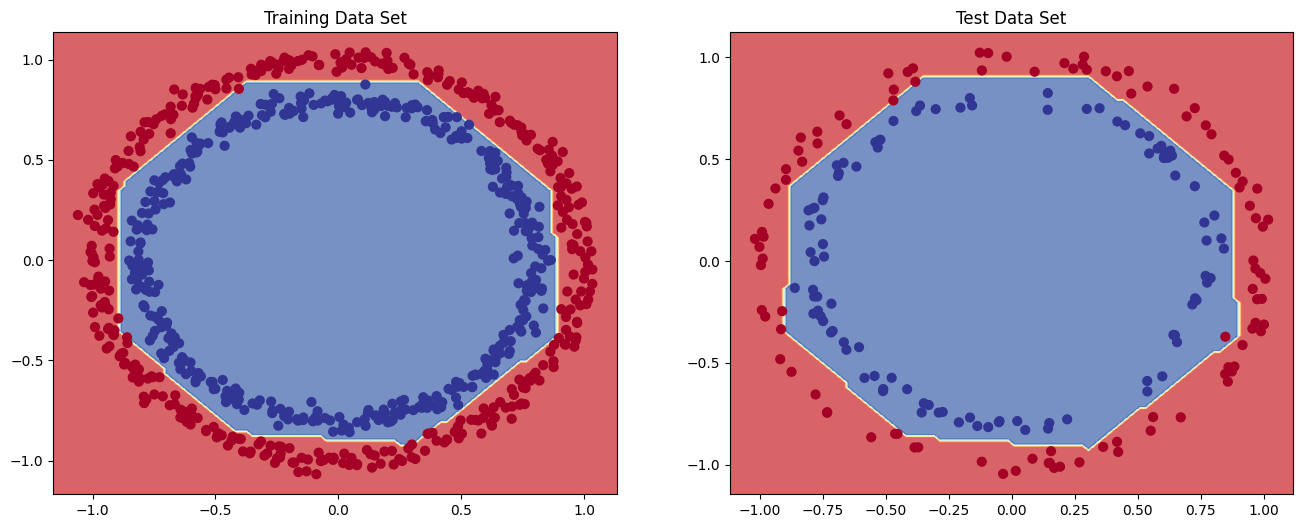

In [33]:
# Plot the decision boundary for training and test data
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_7, X_train, y_train)
plt.title("Training Data Set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_7, X_test, y_test)
plt.title("Test Data Set")
plt.show();

## More classification evaluation methods
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix
- Classification report (scikit learn)

In [34]:
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss: {loss}")
print(f"Model accuracy: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9900
Model loss: 0.056866537779569626
Model accuracy: 99.00%


## Create a Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix


Here the predictions are in probability so we might have to convert it to 0 and 1 to match the binary form that y_test has

In [36]:
# Make predictions
y_preds = model_7.predict(X_test)

# Creating a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))



7/7 [==============================] - 0s 2ms/step


array([[99,  2],
       [ 0, 99]])

### Pretifying Confusion Matrix

In [37]:
import itertools

def plot_confusion_matrix(y_test, y_preds):
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.0

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

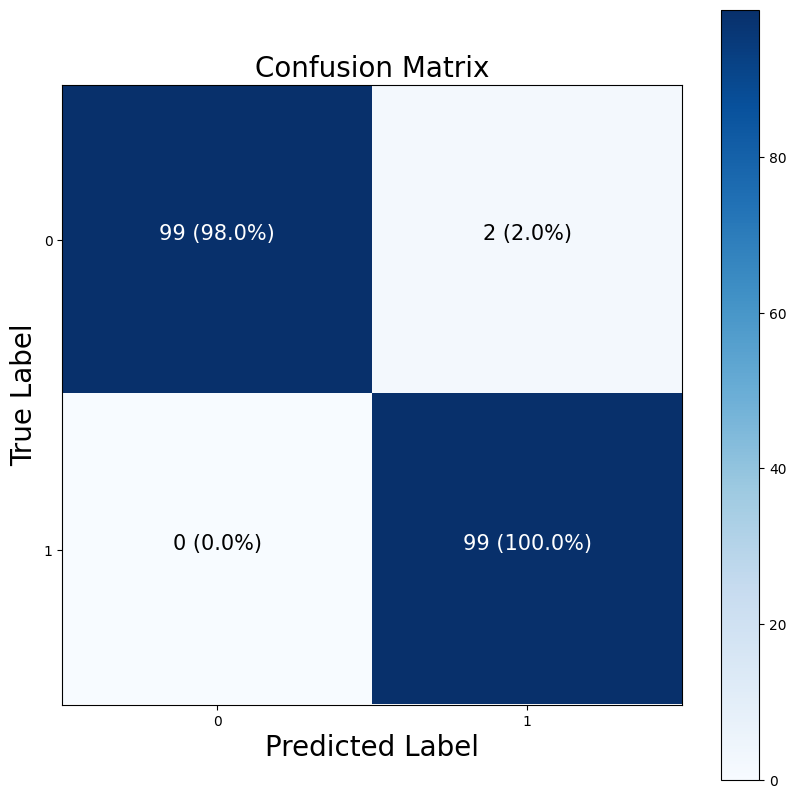

In [38]:
plot_confusion_matrix(y_test, y_preds)